
image 1/1 e:\Hand Segment\1.jpg: 640x480 1 hathseg, 1318.5ms
Speed: 19.6ms preprocess, 1318.5ms inference, 22.7ms postprocess per image at shape (1, 3, 640, 480)
Saved segmented image: segmented_0.png


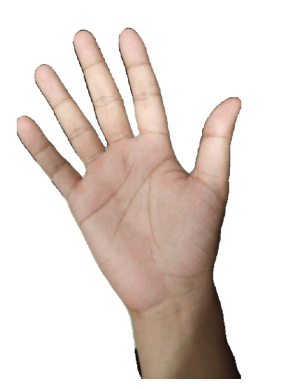

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the model
model = YOLO("hand.pt")

# Perform prediction
results = model.predict('1.jpg', conf=0.7)
results = results[0]


# Extract masks and class labels
extracted_masks = results.masks.data
class_labels = results.boxes.data[:, -1].int().tolist()
masks_by_class = {name: [] for name in results.names.values()}

# Organize masks by class
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = results.names[class_id]
    masks_by_class[class_name].append(mask.cpu().numpy())

# Segment and save images with white background
orig_img = results.orig_img
output_dir = "output"  # Specify output directory

for i, mask in enumerate(masks_by_class['hathseg']):
    resized_mask = cv2.resize(mask, (orig_img.shape[1], orig_img.shape[0]))
    segmented_image = orig_img.copy()
    segmented_image[resized_mask == 0] = 255  # Set pixels outside the mask to white

    # Create a white background
    white_background = np.ones_like(orig_img) * 255

    # Combine the segmented image with the white background
    combined_image = white_background.copy()
    combined_image[resized_mask != 0] = segmented_image[resized_mask != 0]

    # Save the segmented image
    filename = f'segmented_{i}.png'
    cv2.imwrite(filename, combined_image)
    print(f"Saved segmented image: {filename}")

    # Display the segmented image
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



image 1/1 e:\Hand Segment\1.jpg: 640x480 1 hathseg, 935.3ms
Speed: 93.1ms preprocess, 935.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Saved segmented image: segmented_0.png

image 1/1 e:\Hand Segment\segmented_0.png: 640x480 1 FHB, 1 middle, 1 palmB, 2 pinkys, 1 ring, 1 thumb, 784.1ms
Speed: 0.0ms preprocess, 784.1ms inference, 46.9ms postprocess per image at shape (1, 3, 640, 480)
Saved segmented image: segmented_segmented_0_FHB_0.png
Saved segmented image: segmented_segmented_0_middle_0.png
Saved segmented image: segmented_segmented_0_palmB_0.png
Saved segmented image: segmented_segmented_0_pinky_0.png
Saved segmented image: segmented_segmented_0_pinky_1.png
Saved segmented image: segmented_segmented_0_ring_0.png
Saved segmented image: segmented_segmented_0_thumb_0.png


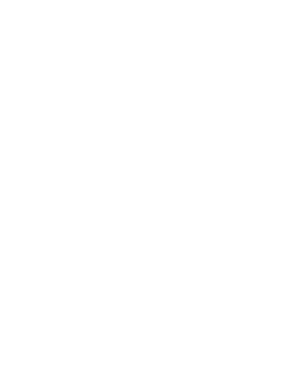

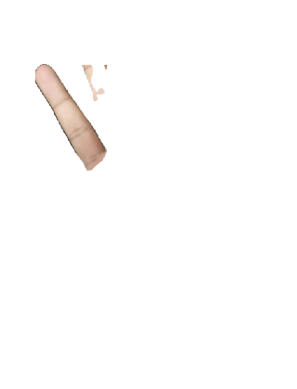

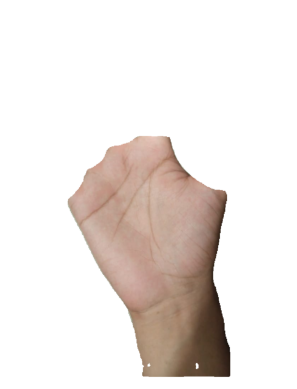

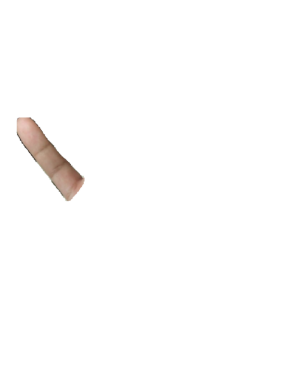

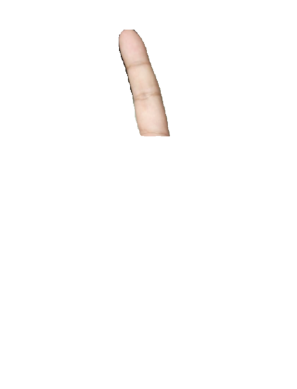

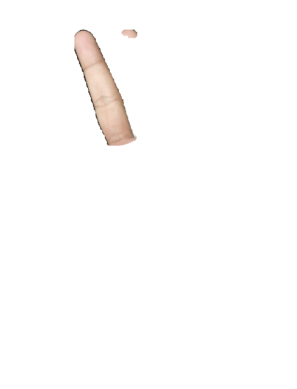

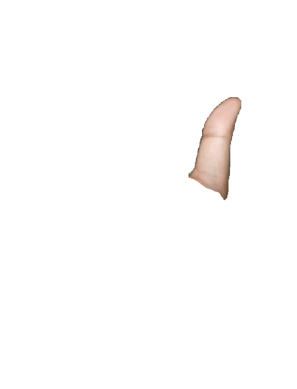

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the first model
first_model = YOLO("hand.pt")

# Perform prediction with the first model
first_results = first_model.predict('1.jpg', conf=0.7)
first_results = first_results[0]

# Extract masks and class labels from the first model
first_extracted_masks = first_results.masks.data
first_class_labels = first_results.boxes.data[:, -1].int().tolist()
first_masks_by_class = {name: [] for name in first_results.names.values()}

# Organize masks by class for the first model
for mask, class_id in zip(first_extracted_masks, first_class_labels):
    class_name = first_results.names[class_id]
    first_masks_by_class[class_name].append(mask.cpu().numpy())

# Segment and save images with white background
orig_img = first_results.orig_img
output_dir = "output"  # Specify output directory

segmented_images = []

for i, mask in enumerate(first_masks_by_class['hathseg']):
    resized_mask = cv2.resize(mask, (orig_img.shape[1], orig_img.shape[0]))
    segmented_image = orig_img.copy()
    segmented_image[resized_mask == 0] = 255  # Set pixels outside the mask to white

    # Save the segmented image with white background
    filename = f'segmented_{i}.png'
    cv2.imwrite(filename, segmented_image)
    segmented_images.append(filename)
    print(f"Saved segmented image: {filename}")

# Load the second model
second_model = YOLO("palm.pt")

# Perform prediction with the second model on the segmented images
for segmented_image_path in segmented_images:
    second_results = second_model.predict(segmented_image_path, conf=0.7)
    second_results = second_results[0]

    # Extract masks and class labels from the second model
    second_extracted_masks = second_results.masks.data
    second_class_labels = second_results.boxes.data[:, -1].int().tolist()
    second_masks_by_class = {name: [] for name in second_results.names.values()}

    # Organize masks by class for the second model
    for mask, class_id in zip(second_extracted_masks, second_class_labels):
        class_name = second_results.names[class_id]
        second_masks_by_class[class_name].append(mask.cpu().numpy())

    # Segment and save images with white background for the second model
    orig_img = second_results.orig_img

    for class_name, masks in second_masks_by_class.items():
        for i, mask in enumerate(masks):
            resized_mask = cv2.resize(mask, (orig_img.shape[1], orig_img.shape[0]))
            segmented_image = orig_img.copy()
            segmented_image[resized_mask == 0] = 255  # Set pixels outside the mask to white

            # Save the new segmented image with white background
            filename = f'segmented_{segmented_image_path.split(".")[0]}_{class_name}_{i}.png'
            cv2.imwrite(filename, segmented_image)
            print(f"Saved segmented image: {filename}")

    # Display the final segmented images
    for class_name, masks in second_masks_by_class.items():
        for i, mask in enumerate(masks):
            resized_mask = cv2.resize(mask, (orig_img.shape[1], orig_img.shape[0]))
            combined_image = orig_img.copy()
            combined_image[resized_mask == 0] = 255  # Set pixels outside the mask to white

            plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
